In [18]:
import pandas as pd
df = pd.read_csv("fct_invoice.csv")

df.head(5)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


Easy
1. How many unique customers are there in the dataset? Can you identify any frequent or loyal customers?

In [19]:
print("Unique customers: "+ str(df['customer_id'].nunique()))
print("Top customers:")
df['customer_id'].value_counts()

Unique customers: 5191
Top customers:


50      128
7       121
4       117
80      113
74      112
       ... 
8042      1
5931      1
5867      1
5451      1
7274      1
Name: customer_id, Length: 5191, dtype: int64

2. What are the different categories of products available? How many unique categories are there?

In [20]:
print("Number of categories: " + str(df['category'].nunique()))
print()
print("Categories:")
for x in df['category'].unique() :
    print(x)

Number of categories: 8

Categories:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


3. What are the different payment methods used by customers? Which payment methods are the most popular?

In [21]:
df['payment_method'].nunique()
methods = (df['payment_method'].unique())

print("Payment methods by popularity (amount of times used)")
df['payment_method'].value_counts()


Payment methods by popularity (amount of times used)


Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

Medium
1. What are the three most popular categories, by total sales?

In [22]:
df['Total Sales'] = df['quantity'] * df['price']
df.groupby(['category']).sum().sort_values('Total Sales', ascending=False).head(3)['Total Sales']
# df['category'].value_counts().head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Total Sales, dtype: float64

2. What are the total sales attributed to customers over the age of 45?


In [23]:
iv = pd.read_json("dim_customer.json")
#df = pd.read_csv("fct_invoice.csv")

iv.rename(columns={"id":"customer_id"})

merged = pd.merge(df,iv,left_on="customer_id",right_on="id")
#over_40 = merged[merged['age']>45].index
#merged.loc[over_40].head()

over_45 = merged.loc[merged['age']>45]
print("Total Sales from people over 45:")
over_45.sum()['Total Sales']
#over_40.count()


Total Sales from people over 45:


82039768.15

As a % of Total Sales

In [24]:
over_40 = merged.loc[merged['age']>45].index
merged.loc[over_40,'40']='over'
below_40 = merged.loc[merged['age']<=45].index
merged.loc[below_40,'40']='below'

count = merged.groupby('40').size()
percentage = count / len(merged) * 100
print("Total purchases based on age by percentage (above or below)")
print(percentage)

Total purchases based on age by percentage (above or below)
40
below    26.870909
over     32.805132
dtype: float64


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [25]:
#winter spring summer fall
#merged['season'] = ''

merged['month'] = pd.DatetimeIndex(df['invoice_date']).month

winter = merged.loc[(merged['month'] == 12) | ((1 <= merged['month']) & (merged['month'] <= 3))].index
merged.loc[winter,'season']='Winter'

spring = merged.loc[(merged['month'] >= 4) & (merged['month'] <= 6)].index
merged.loc[spring, 'season'] = 'Spring'

summer = merged[(merged['month']<= 9) & (merged['month']>= 7)].index
merged.loc[summer,'season'] = 'Summer'

fall = merged[(merged['month']<= 11) & (merged['month']>= 10)].index
merged.loc[fall,'season'] = 'Fall'


<Axes: >

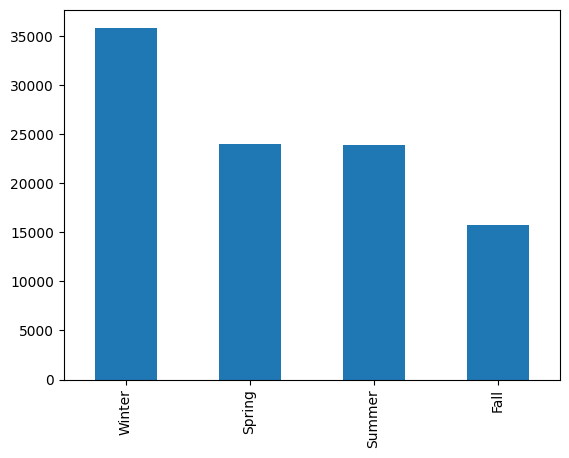

In [26]:
merged['season'].value_counts().plot(kind='bar')

**Graph Explanation:**
The season with the most invoices was winter, which makes sense given that a significant holiday like Christmas encourages people to spend money and purchase more goods. The same might be said for spring and summer, as both seasons have breaks like the summer and spring breaks. The least amount of bills would be in the fall because there are typically no breaks or holidays that people prepare for during this season of the year, which results in less expenditure.

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range


In [27]:
decades = pd.cut(merged['age'],bins=range(10, 101, 10),right=False)
merged.pivot_table(index="category",columns=decades,values="quantity",aggfunc="sum")

age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,
Books,229,1427,1518,1542,1364,1420,1019,500,0
Clothing,1727,9392,10247,10220,9343,9700,7055,4095,0
Cosmetics,730,4060,4871,4460,3958,4344,2807,1752,0
Food & Beverage,697,3906,4540,4677,3824,4243,2862,1637,0
Shoes,457,2716,3186,3148,2652,2696,2017,1180,0
Souvenir,281,1304,1496,1514,1286,1307,903,558,0
Technology,274,1359,1590,1553,1162,1457,931,522,0
Toys,480,2859,3217,2983,2626,2797,2078,1201,0
